# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [399]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [400]:
df = pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [401]:
missing_values = df.isna().sum()
print(missing_values)

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [402]:
duplicate_rows = df.duplicated().value_counts()
print(duplicate_rows)

False    17414
dtype: int64


### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [403]:
df['season'].value_counts().values

array([4394, 4387, 4330, 4303], dtype=int64)

In [404]:
df['season'].value_counts().index

Float64Index([0.0, 1.0, 3.0, 2.0], dtype='float64')

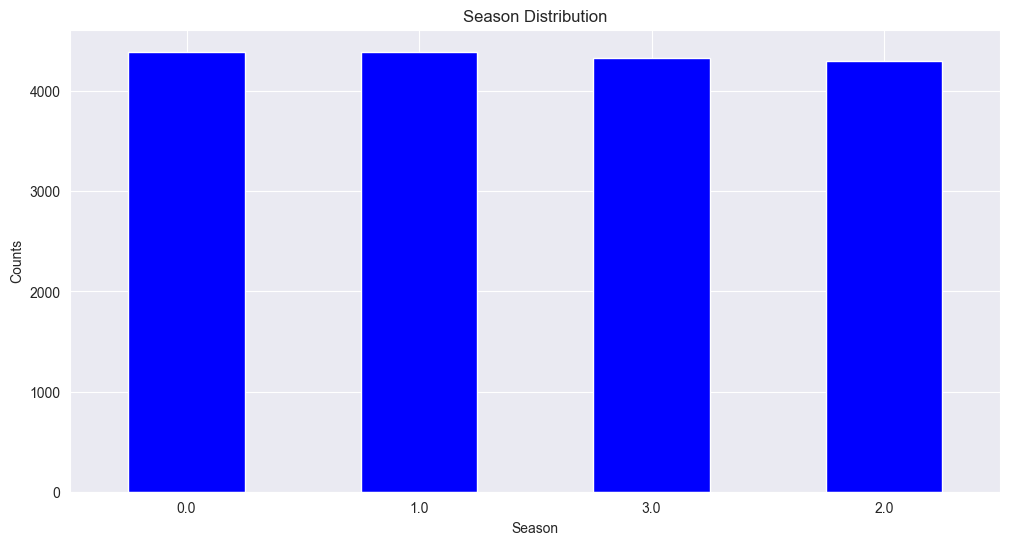

In [405]:
# season
plt.figure(figsize=(12, 6))
df['season'].value_counts().plot.bar( color='blue')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()



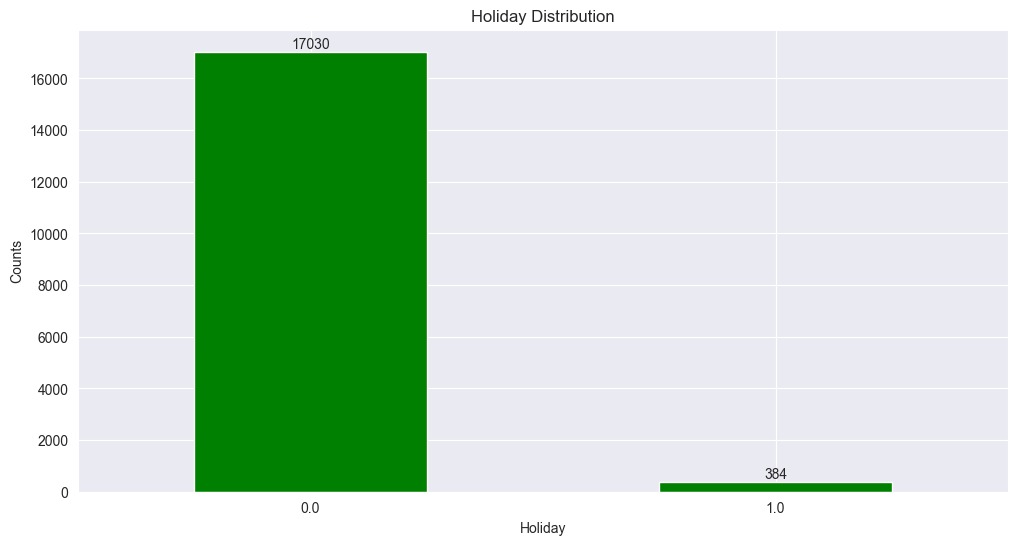

In [406]:
# is_holiday
plt.figure(figsize=(12, 6))
chart = df['is_holiday'].value_counts().plot.bar(color='green')
chart.bar_label(chart.containers[0], fmt='%d')
plt.title('Holiday Distribution')
plt.xlabel('Holiday')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

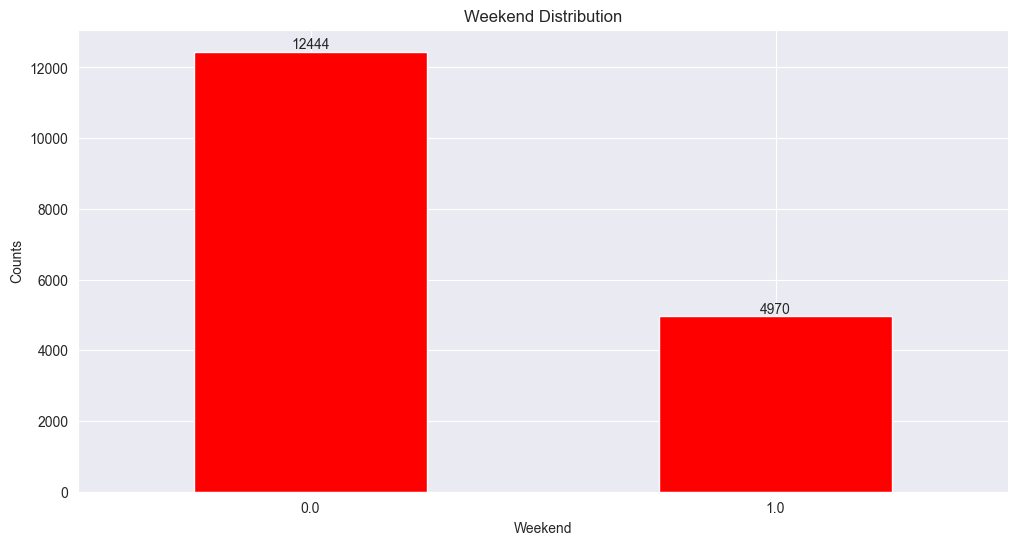

In [407]:
# is_weekend
plt.figure(figsize=(12, 6))
chart = df['is_weekend'].value_counts().plot.bar(color='red')
chart.bar_label(chart.containers[0], fmt='%d')
plt.title('Weekend Distribution')
plt.xlabel('Weekend')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()



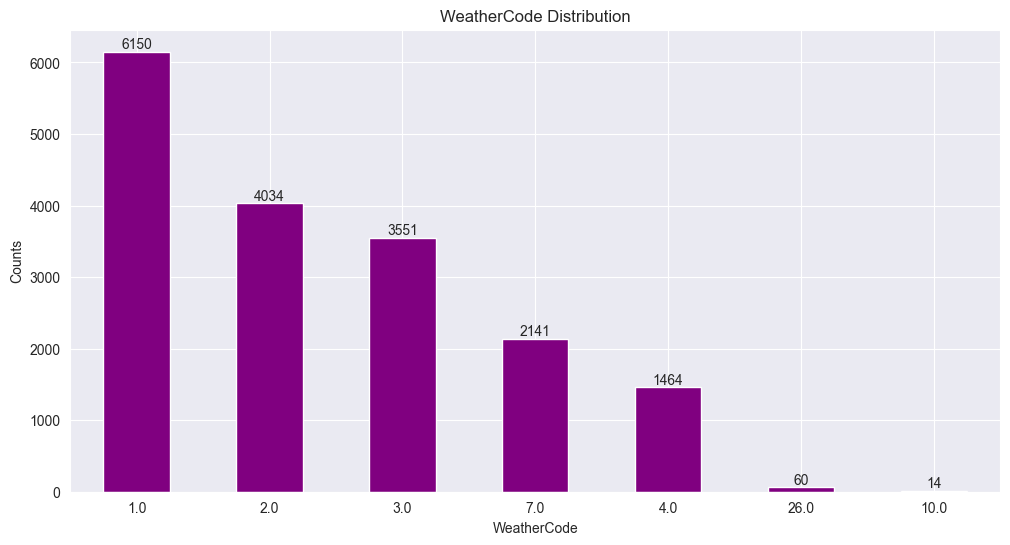

In [408]:
# weather_code
plt.figure(figsize=(12, 6))
chart = df['weather_code'].value_counts().plot.bar(color='purple')
chart.bar_label(chart.containers[0], fmt='%d')
plt.title('WeatherCode Distribution')
plt.xlabel('WeatherCode')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [409]:
print(df.dtypes)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [410]:
type(df['timestamp'][0])

str

In [411]:
df.timestamp = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [412]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

In [413]:
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['hour'] = df.index.hour
df['month'] = df.index.month
df['season'] = (df.month%12 + 3)//3
df['year'] = df.index.year
df['year_month'] = df.index.strftime('%Y-%m')


In [414]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,1,6,4,0,1,2015,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,1,6,4,1,1,2015,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,1,6,4,2,1,2015,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,1,6,4,3,1,2015,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,1,6,4,4,1,2015,2015-01


### 7.Visualize the correlation with a heatmap

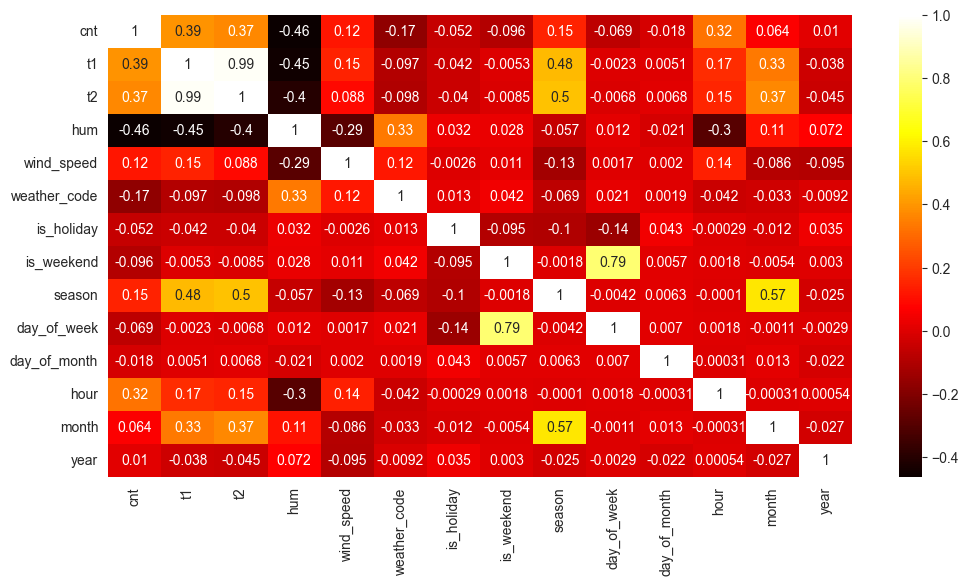

In [415]:
# for all variables 
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='hot')
plt.show()


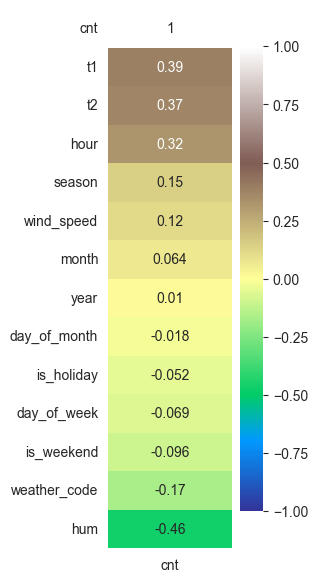

In [416]:
# for the target variable
plt.figure(figsize=(2, 7))
target_corr = df.corr()[['cnt']].sort_values(by='cnt', ascending=False)
sns.heatmap(target_corr, vmin=-1, vmax=1, annot=True, cmap='terrain')
plt.show()


### 8. Visualize the correlation of the target variable and the other features with barplot

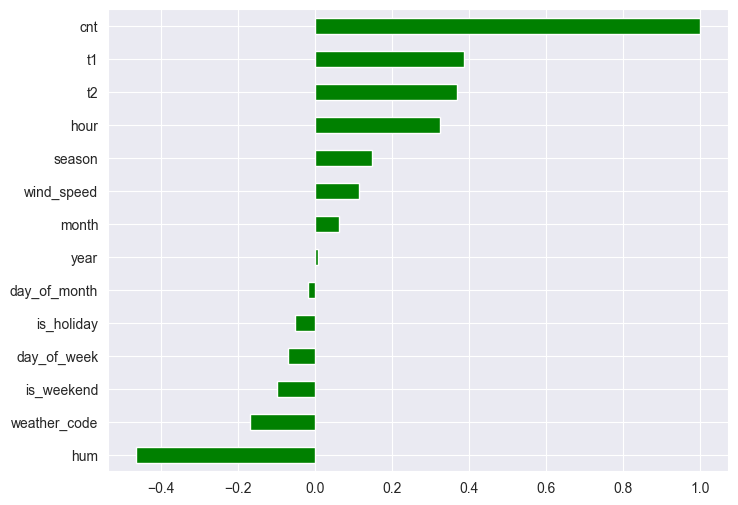

In [417]:
#with pandas
corr = df.corr()
plt.figure(figsize=(8, 6))
corr_target = corr['cnt'].sort_values()
corr_target.plot(kind='barh', color='g')
plt.show()

### 9.Plot bike shares over time use lineplot

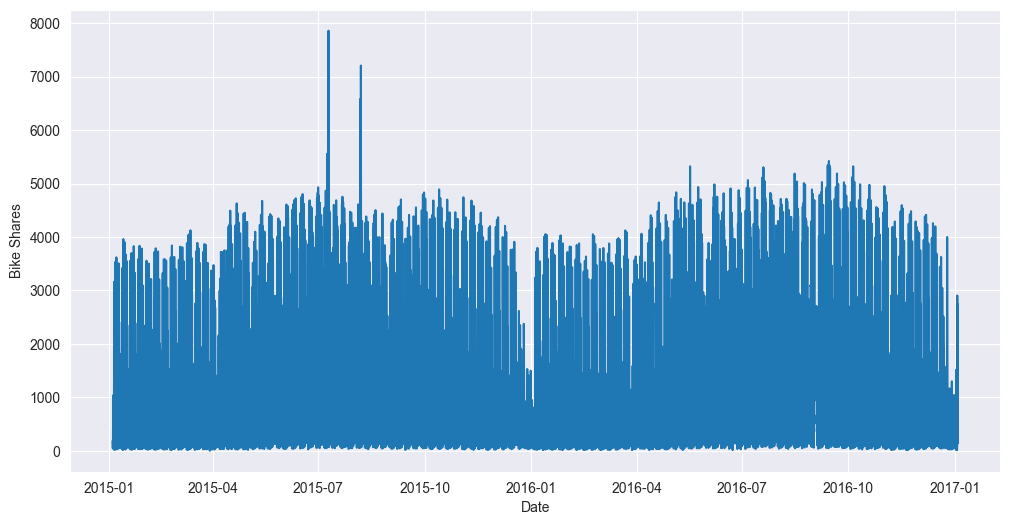

In [418]:
plt.figure(figsize=(12, 6))
# plt.plot(df['cnt'])
sns.lineplot(x=df.index, y='cnt', data=df)
plt.xlabel("Date")
plt.ylabel("Bike Shares")
plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [419]:
# df['month'] = df.index.month
# df['year_month'] = df.index.strftime('%Y-%m')
grouped = pd.DataFrame(df.groupby(['year_month']).cnt.sum())
grouped

,cnt
year_month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


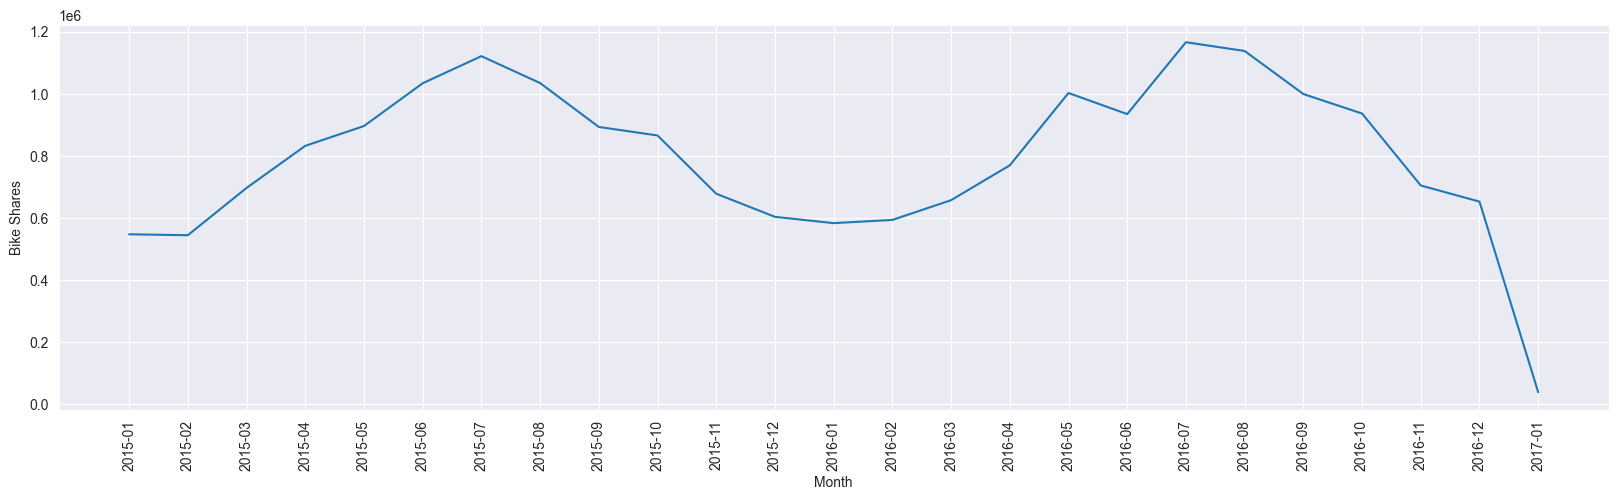

In [420]:
# with lineplot
plt.figure(figsize=(20, 5))
sns.lineplot( x= grouped.index, y='cnt', data=grouped)
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='month', ylabel='cnt'>

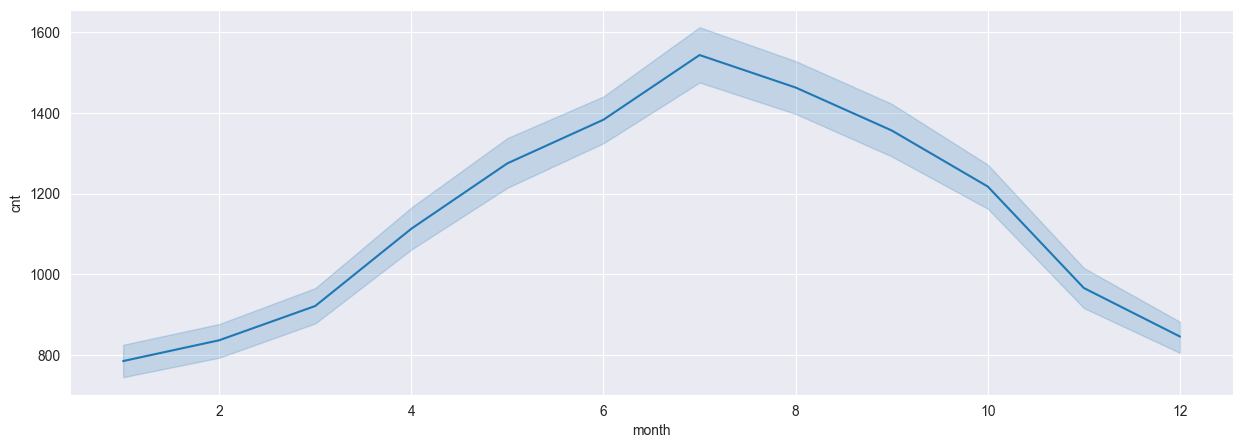

In [421]:
# with lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='cnt', data=df)


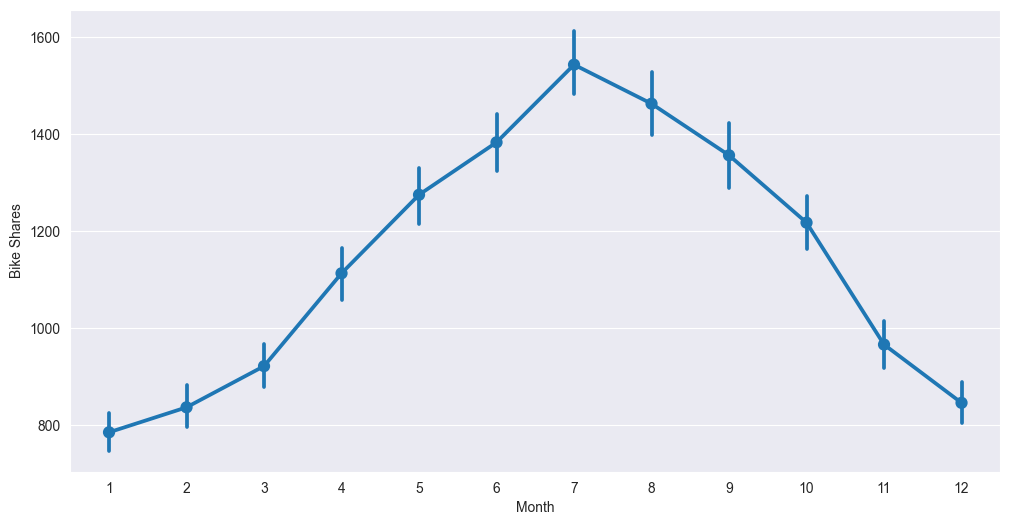

In [422]:
# with pointplot
df.groupby("month")["cnt"].mean()
plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='cnt', data=df)
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.show()


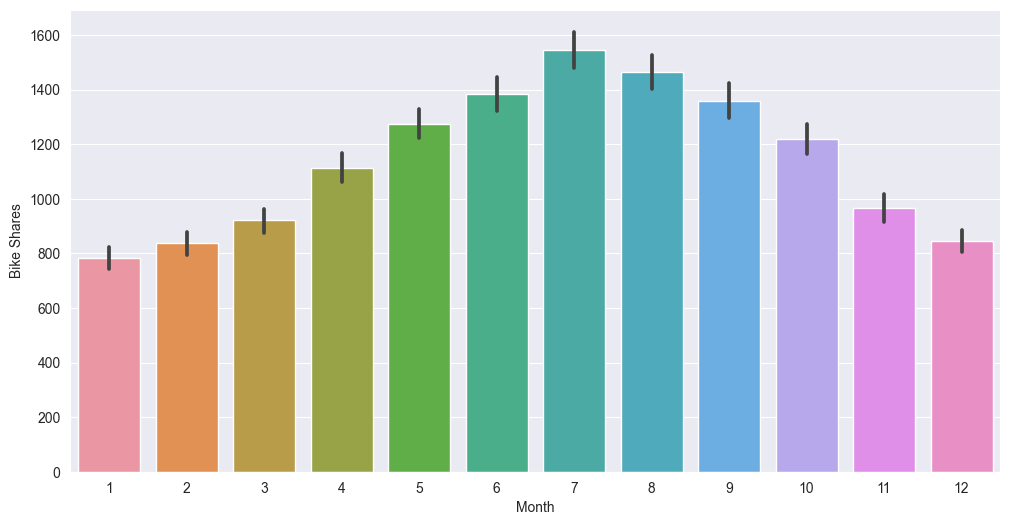

In [423]:
# with barplot
plt.figure(figsize=(12, 6))
sns.barplot( x='month', y='cnt', data=df)
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.show()


### 11.Plot bike shares by hours on (holidays, weekend, season)

In [424]:
df['day_of_week'] = df.index.dayofweek
df['day_of_month'] = df.index.day
df['hour'] = df.index.hour
df['month'] = df.index.month
df['season'] = (df.month%12 + 3)//3
df['year'] = df.index.year
df['year_month'] = df.index.strftime('%Y-%m')
df['Holiday'] = np.where(df['day_of_week'] >= 5, "Weekend", "Weekday")
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df['Season'] = df['month'].apply(get_season)
grouped = df.groupby(['hour', 'Holiday', 'Season']).mean()

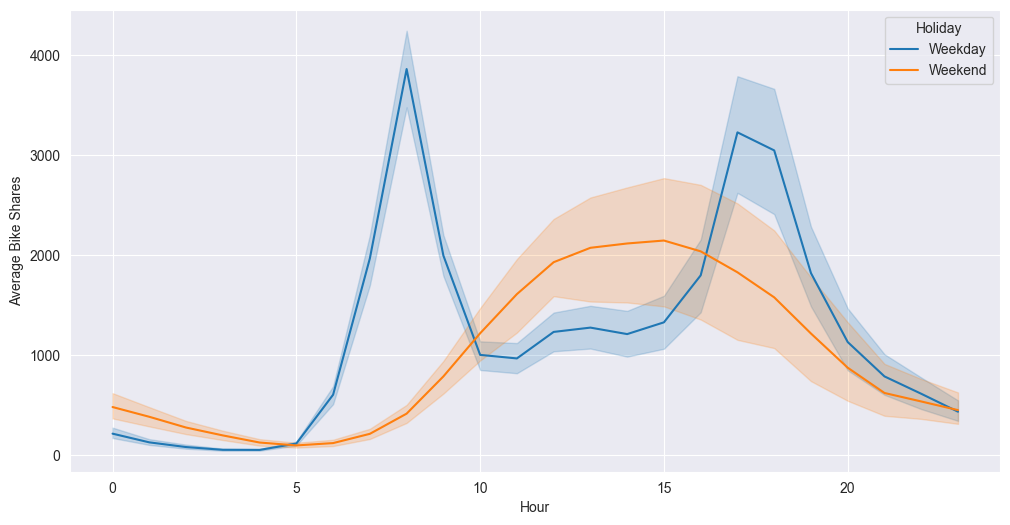

In [425]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', hue='Holiday', data=grouped.reset_index())
plt.xlabel("Hour")
plt.ylabel("Average Bike Shares")
plt.show()

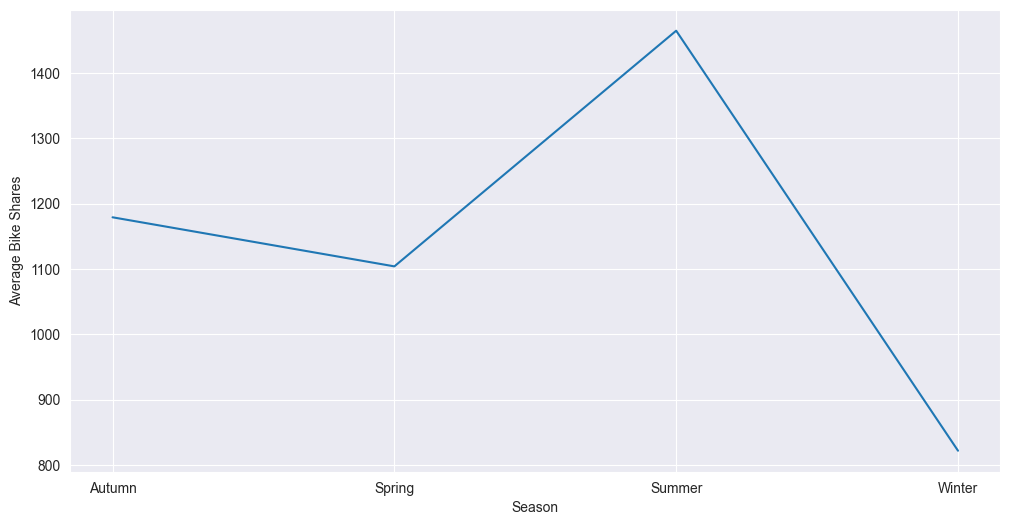

In [427]:
# with lineplot (*You may want to see seasonal breakdowns*)
grouped = df.groupby('Season').cnt.mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=grouped.index, y='cnt', data=grouped.reset_index())
plt.xlabel("Season")
plt.ylabel("Average Bike Shares")
plt.show()

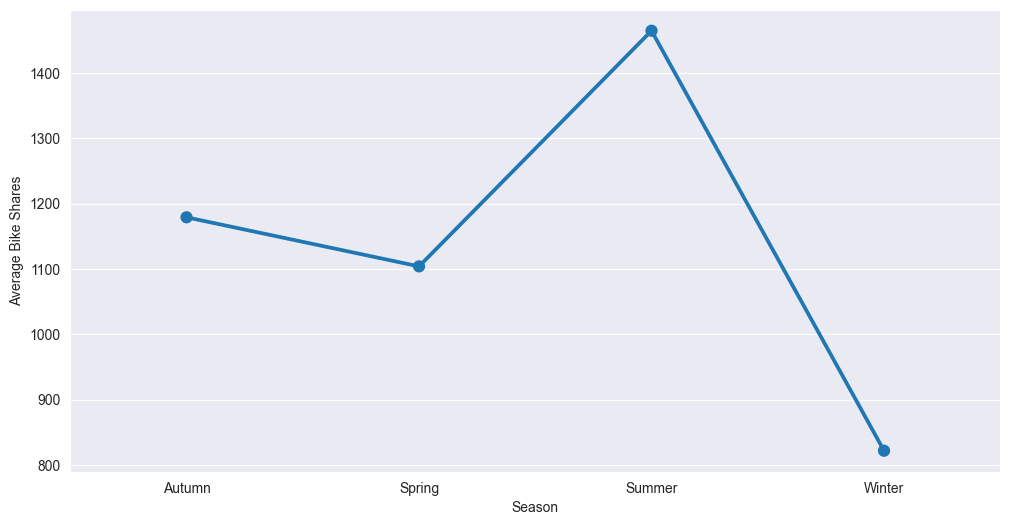

In [428]:
# with pointplot
grouped = df.groupby('Season').cnt.mean()
plt.figure(figsize=(12, 6))
sns.pointplot(x=grouped.index, y='cnt', data=grouped.reset_index())
plt.xlabel("Season")
plt.ylabel("Average Bike Shares")
plt.show()

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

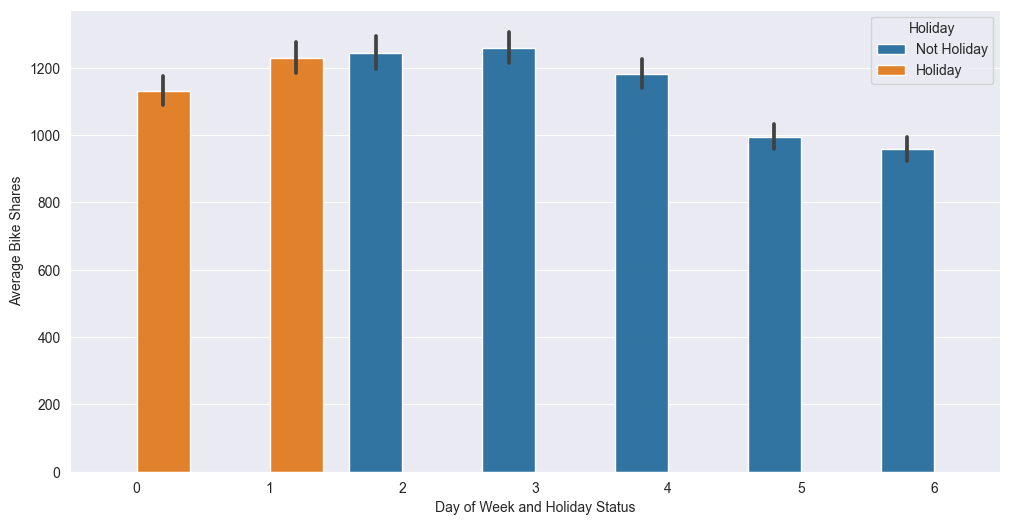

In [430]:
# with barplot
plt.figure(figsize=(12, 6))
df['Holiday'] = df['day_of_week'].isin(df['is_holiday'] )
df['Holiday'] = df['Holiday'].apply(lambda x: 'Holiday' if x else 'Not Holiday')
sns.barplot(x='day_of_week', y='cnt', data=df, hue='Holiday')
plt.xlabel("Day of Week and Holiday Status")
plt.ylabel("Average Bike Shares")
plt.show()

<AxesSubplot: xlabel='day_of_week', ylabel='cnt'>

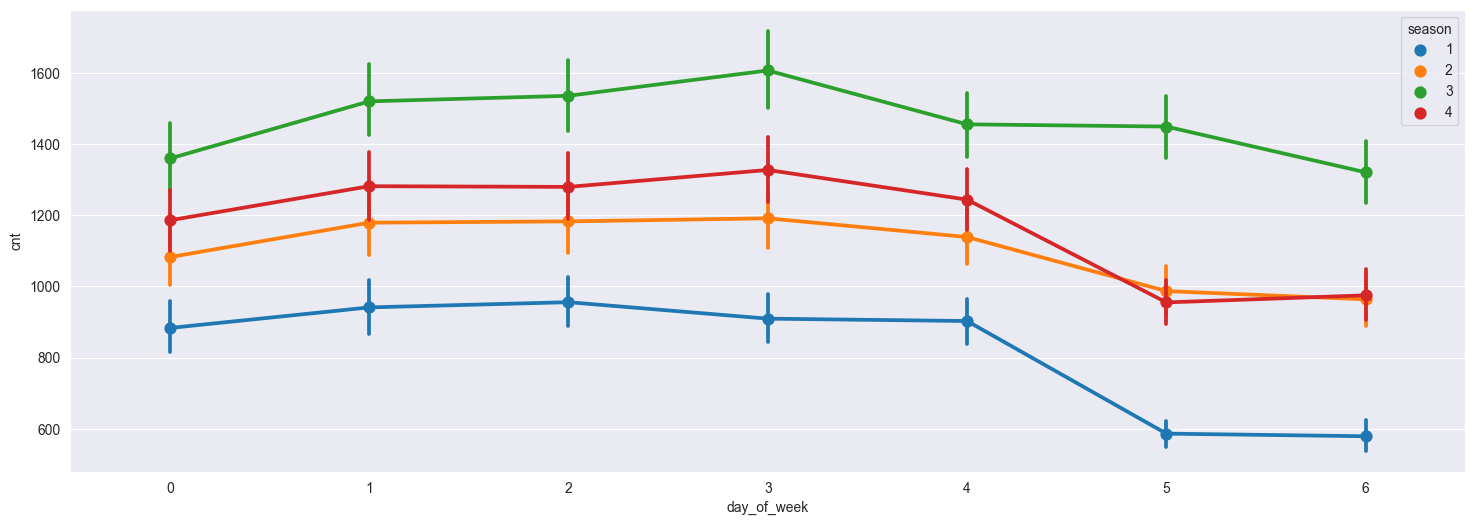

In [437]:
# with pointplot
plt.figure(figsize=(18, 6))
sns.pointplot(data=df, x='day_of_week', y='cnt', hue= 'season')

### 13.Plot bike shares by day of month

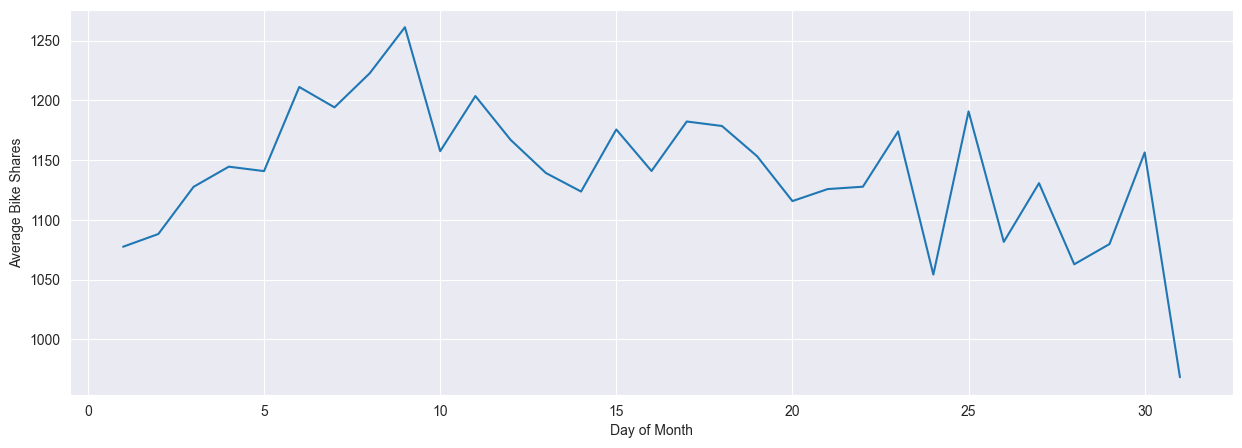

In [442]:
#with lineplot
plt.figure(figsize=(15, 5))
df['day_of_month'] = df.index.day
grouped = df.groupby('day_of_month').cnt.mean()
sns.lineplot(x=grouped.index, y='cnt', data=grouped.reset_index())
plt.xlabel("Day of Month")
plt.ylabel("Average Bike Shares")
plt.show()



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

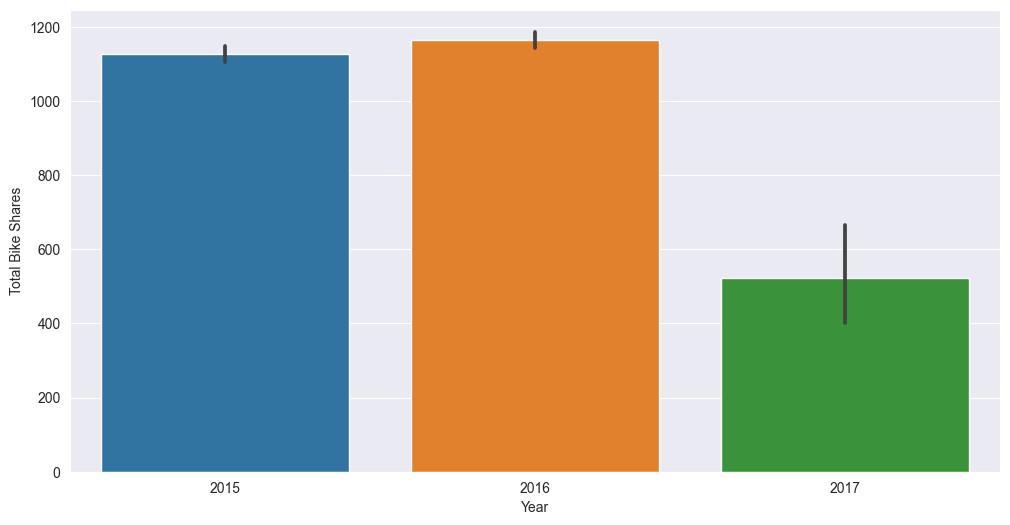

In [443]:
# with barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='cnt', data=df)
plt.xlabel("Year")
plt.ylabel("Total Bike Shares")
plt.show()



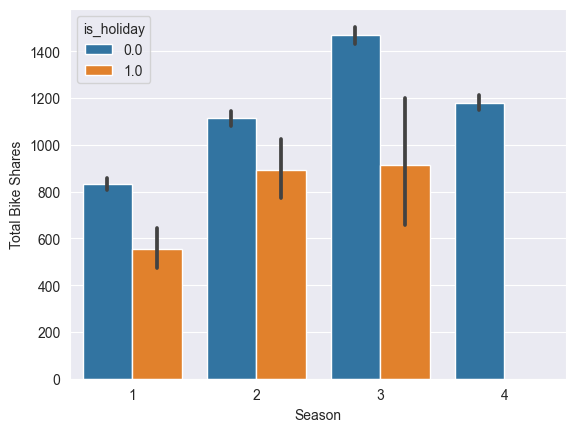

In [451]:
# with barplot
sns.barplot(x='season', y='cnt', data=df, hue='is_holiday')
plt.xlabel("Season")
plt.ylabel("Total Bike Shares")
plt.show()

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [452]:
df['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

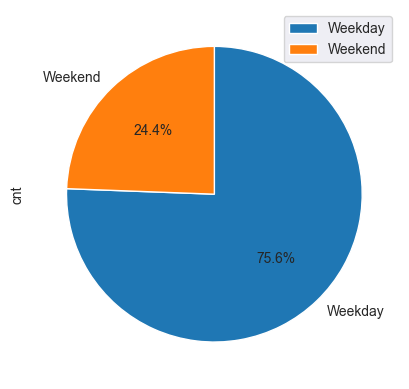

In [459]:
# pie chart
df['day_of_week'] = df.index.dayofweek
df['Weekend'] = df['day_of_week'].isin([5, 6])
df['Weekend'] = df['Weekend'].map({True: 'Weekend', False: 'Weekday'})
grouped_weekend = df.groupby('Weekend').sum()
grouped_weekend.plot.pie(y='cnt', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.show()


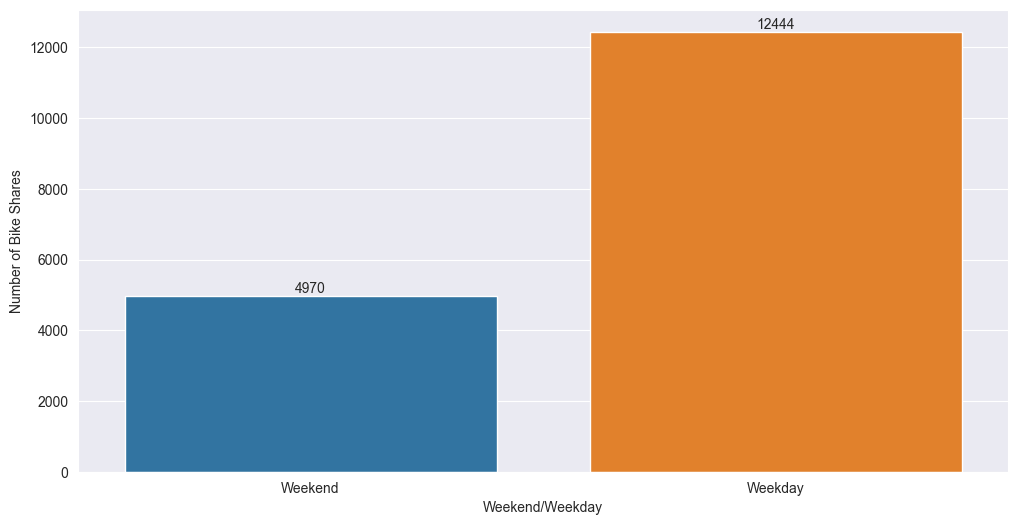

In [460]:
# with countplot
plt.figure(figsize=(12, 6))
chart = sns.countplot(x=df['Weekend'], data= grouped_weekend)
chart.bar_label(chart.containers[0], fmt='%d')
plt.xlabel("Weekend/Weekday")
plt.ylabel("Number of Bike Shares")
plt.show()


### 16.Plot the distribution of weather code by seasons

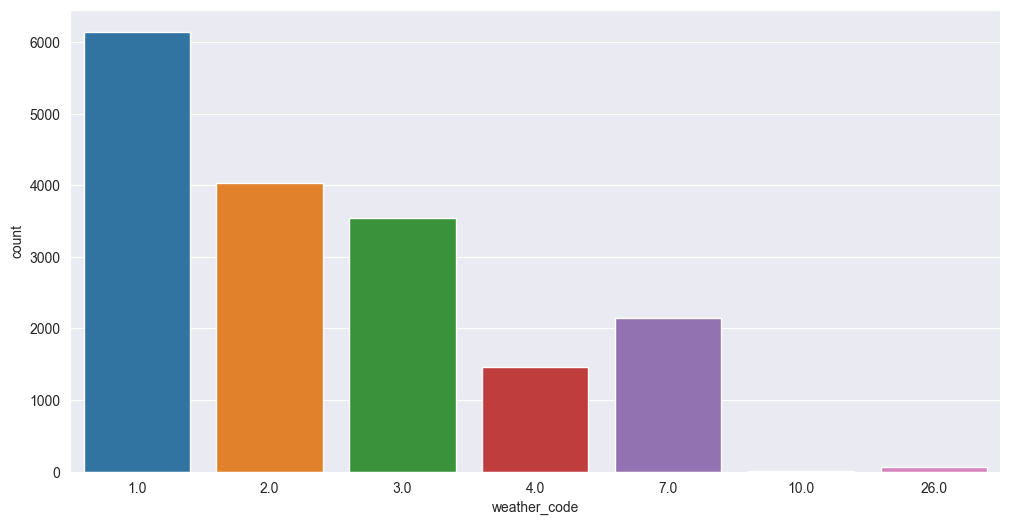

In [464]:
# with countplot
plt.figure(figsize=(12, 6))
sns.countplot(x=df['weather_code'],   data=df)
plt.show()


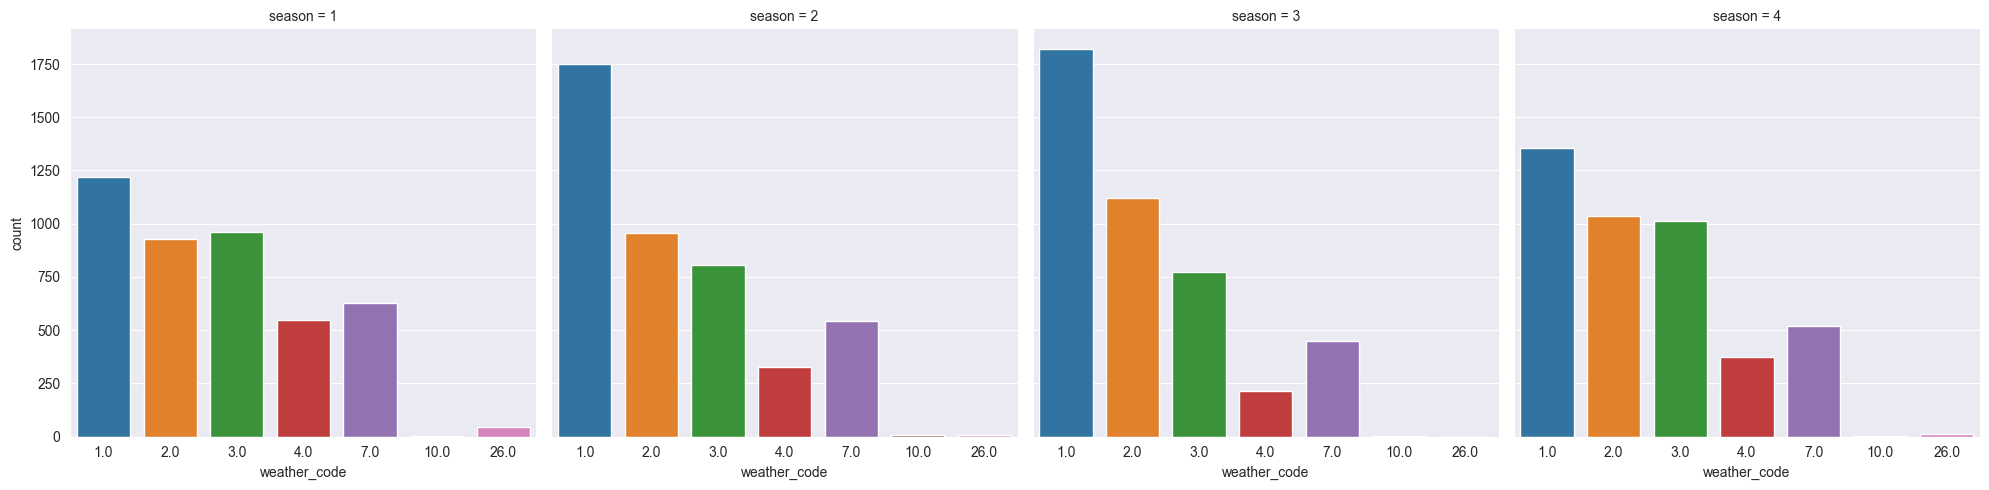

In [467]:
# with catplot
sns.catplot(x='weather_code', col = 'season' , data=df, kind='count')
